# 13_MiniAlexNet-Supervised-SBATCH

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.load_MNIST import load_MNIST

from src.training_results import CNNSupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [3]:
train_dataloader, val_dataloader, test_dataloader = load_MNIST(
    root='./data', subset_frac=0.05, 
    batch_size=32, validation_ratio=6, seed=42
)

In [4]:
test_results = CNNSupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/13/no_prune_CNN_fast/sbatch-TEST_ds-MNIST_bs-32_sf-0.05_sl-49_vr-6_nti-5_lmd-10_m-5.0_pmt-NoPrune_g-0.1_lr-0.001_s-4")
test_results.params['ic'] = 1

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

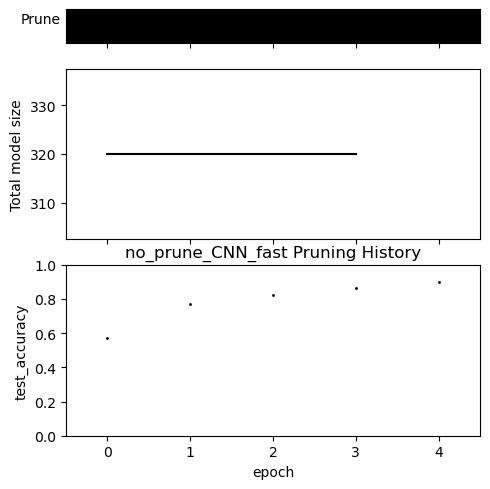

In [6]:
test_results.plot_pruning()

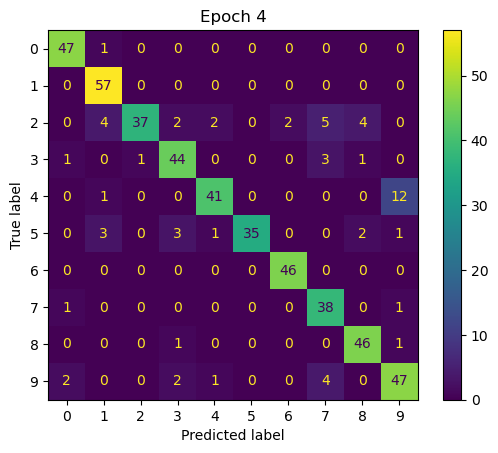

In [10]:
test_results.set_trained_model(4)
test_results.plot_confusion_matrix(test_dataloader)

# Full runs

```bash
$ sbatch sbatch_scripts/13_no-prune_CNN_fast.sh 
Submitted batch job 56931754
$ sbatch sbatch_scripts/13_activity-prune_CNN_fast_MNIST.sh 
Submitted batch job 56931799
$ sbatch sbatch_scripts/13_random-prune_CNN_fast_MNIST.sh 
Submitted batch job 56931809
```